# Combining centering and scaling (From Previous Part)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

In [21]:
print('mean: ', datamart_normalized.mean(axis=0).round(2))
print('std: ', datamart_normalized.std(axis=0).round(2))

mean:  [-0.  0. -0.]
std:  [1. 1. 1.]


# Running k-means

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1)

In [23]:
kmeans.fit(datamart_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [24]:
cluster_labels = kmeans.labels_

In [25]:
type(cluster_labels)

numpy.ndarray

# Create a cluster label column in the original DataFrame:

In [26]:
datamart_rfm_k2 = datamart_rfm.assign(Cluster_Number = cluster_labels)

In [27]:
datamart_rfm_k2.head()

,Recency,Frequency,MonetaryValue,Cluster_Number
CustomerID,,,,
12747,2,27,121712,0
12748,1,967,5625961,1
12749,4,37,277003,0
12820,3,17,114433,0
12822,71,9,59892,0


In [28]:
type(datamart_rfm_k2)

pandas.core.frame.DataFrame

# Calculate average RFM values and size for each cluster:

In [29]:
datamart_rfm_k2.groupby(['Cluster_Number']).agg({'Recency': 'mean',
                                                 'Frequency': 'mean',
                                                 'MonetaryValue': ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                  mean      mean          mean count
Cluster_Number                                      
0                 94.0      18.0      108977.0  3698
1                  2.0    1185.0     7025764.0     3

# Elbow criterion method for choosing optimal number of clusters

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(datamart_rfm)
datamart_normalized = scaler.transform(datamart_rfm)

In [31]:
# Importing key libraries
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [32]:
# Fitting KMeans and calculate SSE(Sum of squared error) for each 'k'
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(datamart_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster center

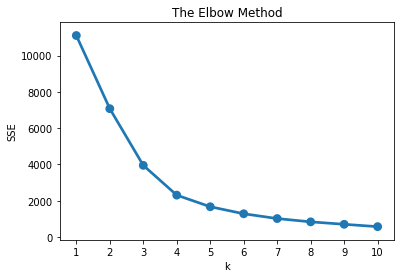

In [33]:
# Plot SSE for each 'k'
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# Running k-means for clusters = 3

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)

In [35]:
kmeans.fit(datamart_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [36]:
cluster_labels = kmeans.labels_

In [37]:
datamart_rfm_k3 = datamart_rfm.assign(Cluster_Number = cluster_labels)

In [38]:
datamart_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,2,27,121712
12748,1,967,5625961
12749,4,37,277003
12820,3,17,114433
12822,71,9,59892


In [39]:
datamart_rfm_k3.head()

,Recency,Frequency,MonetaryValue,Cluster_Number
CustomerID,,,,
12747,2,27,121712,1
12748,1,967,5625961,2
12749,4,37,277003,1
12820,3,17,114433,1
12822,71,9,59892,1


# Calculate average RFM values and sizes for each cluster:

In [40]:
datamart_rfm_k2.groupby(['Cluster_Number']).agg({'Recency': 'mean',
                                                'Frequency': 'mean',
                                                'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
                  mean      mean          mean count
Cluster_Number                                      
0                 94.0      18.0      108977.0  3698
1                  2.0    1185.0     7025764.0     3

In [41]:
datamart_rfm_k3.groupby(['Cluster_Number']).agg({'Recency': 'mean',
                                                 'Frequency': 'mean',
                                                 'MonetaryValue': ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue      
                  mean      mean          mean count
Cluster_Number                                      
0                243.0       6.0       35231.0   976
1                 41.0      23.0      135420.0  2722
2                  2.0    1185.0     7025764.0     3